# <span style="color:red"> NUMERICAL EXERCISES 01 </span>

## <span style="color:blue">Exercise 01.1 </span>

###### 1.  MEAN VALUE: Estimation of $\langle r \rangle = \int_0^1 r dr = 1/2$

In this exercise I test the Pseudo-Random Number generator, computing the mean value of random numbers uniformly sampled in (0,1). 
Instead of doing a simple mean of the data, I use the block average method. Here, in reality, it is not strictly necessary, but in the future this will be useful to avoid problems of auto-correlation of the data.

The block average method consists of dividing $M$ (here: $M=100,000$) data produced by Monte Carlo methods into $N$ (here: $N=100$) blocks. Each block will contain $M/N=L$ data, where we need to choose $L$ longer than the correlation time of the data.
In each of the blocks, the required quantity (here: $r$) and its square are calculated using the $L$ data, and then the mean and variance are computed over the $N$ blocks.

The graph represents the difference between the progressive estimate (with error bars) and the true value for the mean, as a function of the number of blocks. It can be seen that the estimate is compatible with the true value.

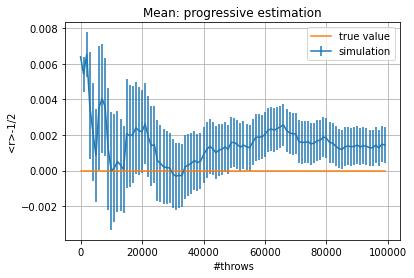

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]
z = np.zeros(N)

sum_prog, err_prog = np.loadtxt("data/media.txt", usecols =(0,1), unpack = 'true')
    
x*=L # Number of throws = block * (Number of throws in each block)

plt.errorbar(x,sum_prog-0.5,yerr=err_prog, label='simulation')
plt.plot(x,z, label='true value')
plt.title('Mean: progressive estimation')
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.legend()

plt.show()

###### CHECK OF CENTRAL LIMIT THEOREM (CLT): 
The graph below represents the progressive trend of the error on the mean as a function of block $N$. This trend must be, for CLT, proportional to the reciprocal of the root of $N$. The fit $y=aN^k$ certifies this trend.

Optimized param a, k:
[ 0.43664101 -0.52895061]
Param uncertaintes:
[1.51539066e-03 7.44922871e-05]


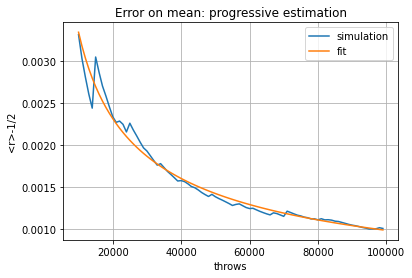

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,a,k): 
      return a*x**k

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]
x *= L

sum_prog, err_prog = np.loadtxt("data/media.txt", usecols =(0,1), unpack = 'true')

for i in range(10):
    x = np.delete(x,0)
    err_prog = np.delete(err_prog,0)

plt.plot(x, err_prog, label='simulation')
p_opt, p_cov = curve_fit(f,x,err_prog)
y_fit=f(x,p_opt[0], p_opt[1])
plt.plot(x, y_fit, label='fit')
plt.title('Error on mean: progressive estimation')
plt.xlabel('throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.legend()

print("Optimized param a, k:")
print(p_opt)
print("Param uncertaintes:")
print(np.diagonal(p_cov))

plt.show()

###### 2.  VARIANCE: Estimation of $\langle(r-\langle r \rangle)^2 \rangle = \sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$

This exercise is equal to the previous, with the difference that in every block I compute the variance instead of the mean.

The graph represents the difference between the progressive estimate (with error bars) and the true value for the variance, as a function of the number of blocks. It can be seen that the estimate is compatible with the true value.

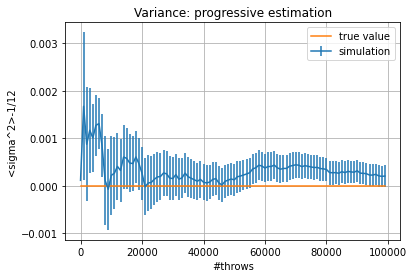

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]
z = np.zeros(N)

sum_prog, err_prog = np.loadtxt("data/varianza.txt", usecols =(0,1), unpack = 'true')
    
x*=L # Number of throws = block * (Number of throws in each block)

plt.errorbar(x,sum_prog-1./12,yerr=err_prog, label='simulation')
plt.plot(x,z, label='true value')
plt.title('Variance: progressive estimation')
plt.xlabel('#throws')
plt.ylabel('<sigma^2>-1/12')
plt.grid(True)
plt.legend()

plt.show()

###### 3. CHI SQUARE TEST

I perform a chi square test to test the efficiency of the pseudo-random number generator.

The histogram represents the values per $10000$ ratings of chi square for a uniform distribution in $(0,1)$. The fit is made with the true expected probability distribution for chi square, with $k=100-1=99$ degrees of freedom. The PDE is:

$f(x;\,k) =\dfrac{x^{\frac k 2 -1} e^{-\frac x 2}}{2^{\frac k 2} \Gamma\left(\frac k 2 \right)}$

Optimized param k, N:
[99.1384873   1.00791122]
Param uncertaintes:
[1.05366915e-02 2.74481543e-05]


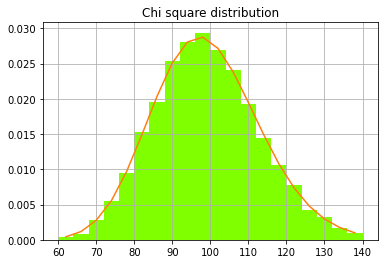

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import gamma

def f(x,k,N):
    return N*(x**(k/2-1)*np.exp(-x/2))/(2**(k/2)*gamma(k/2))

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

n_bins = 20
v = np.loadtxt("data/chiquadro.txt", unpack = 'true')

n, bins, platches = plt.hist(v, n_bins, range=(60,140), density=1, facecolor='chartreuse')
plt.title("Chi square distribution")
plt.grid(True)

bins = bins + 80/(n_bins*2)
bins = np.delete(bins, n_bins)
p_opt, p_cov= curve_fit(f, bins, n, bounds=([0,0],[200,2]))
y_fit = f(bins, p_opt[0], p_opt[1])
plt.plot(bins, y_fit)
print("Optimized param k, N:")
print(p_opt)
print("Param uncertaintes:")
print(np.diagonal(p_cov))


plt.show()

## <span style="color:blue">Exercise 01.2 </span>

In this exercise I check the Central Limit Theorem. For $4$ different probability distributions I have drown for $10,000$ times:
- a number;
- an average between two numbers;
- an average between ten numbers;
- an average between 100 numbers. 

Representation: 4 histograms for every distribution (with Gaussian or Lorentian fit). 

The mean distribution between one hundred numbers will be well approximated by a Gaussian ($y=a\exp{\left[-\left(\frac{x-c}{2b}\right)^2\right]}$) according to the LCT or by a Lorentian in case the initial distribution is a Lorentian, which has infinite variance ($y=a\frac{b}{(x-c)^2 + b^2}$). The mean and variance parameters given by the fits match with the expected values.

To enable both the comparison between the four graphs and the fit visualization, I made the fourth graph at two different scales.

###### 1. UNIFORM DISTRIBUTION: $p(x)=1$ where $x \in (0,1)$

Optimized param a, b, c:
[13.89269295  0.02039248  0.49961529]
Param uncertaintes:
[2.11900092e-02 6.10649922e-08 1.21668264e-07]


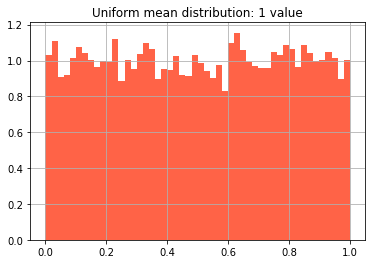

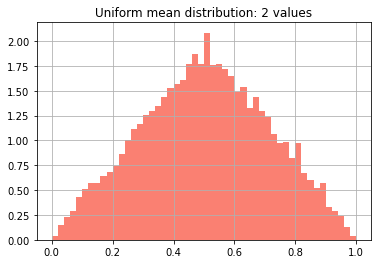

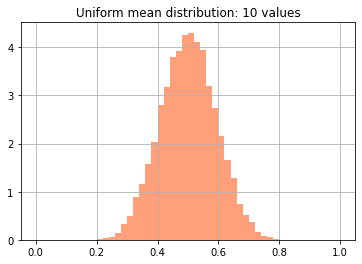

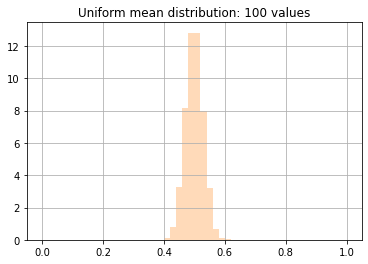

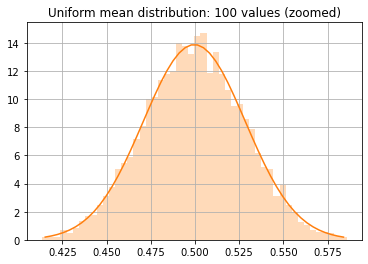

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,a,b,c):
    return a*np.exp(-((x-c)/(2*b))**2)

n_bins = 50

v = np.loadtxt("data/uniform.txt", unpack = 'true')
v1 = v.copy()
v1 = v1[:10000] 
v2 = v.copy()
v2 = v2[10000:20000]
v3 = v.copy()
v3 = v3[20000:30000] 
v4 = v.copy()
v4 = v4[30000:40000]

plt.hist(v1, n_bins, range=(0,1), density=1, facecolor='tomato')
plt.title("Uniform mean distribution: 1 value")
plt.grid(True)

plt.figure()
plt.hist(v2, n_bins, range=(0,1), density=1, facecolor='salmon')
plt.title("Uniform mean distribution: 2 values")
plt.grid(True)

plt.figure()
plt.hist(v3, n_bins, range=(0,1),  density=1, facecolor='lightsalmon')
plt.title("Uniform mean distribution: 10 values")
plt.grid(True)

plt.figure()
plt.hist(v4, n_bins, range=(0,1), density=1, facecolor='peachpuff')
plt.title("Uniform mean distribution: 100 values")
plt.grid(True)

plt.figure()
n, bins, platches = plt.hist(v4, n_bins, range=(np.mean(v4)-3*np.std(v4),np.mean(v4)+3*np.std(v4)), density=1, facecolor='peachpuff')
plt.title("Uniform mean distribution: 100 values (zoomed)")
plt.grid(True)


# fit
x = bins + (6*np.std(v4))/(n_bins*2)
x = np.delete(x, n_bins)
y = n;
p_opt, p_cov= curve_fit(f, x, y, bounds=([0,0,-1,],[20,1,3]))
y_fit = f(x, p_opt[0], p_opt[1], p_opt[2])
plt.plot(x, y_fit)
print("Optimized param a, b, c:")
print(p_opt)
print("Param uncertaintes:")
print(np.diagonal(p_cov))

plt.show()


###### 2. EXPONENTIAL DISTRIBUTION: $p(x) = \lambda \exp(-\lambda x)$ where $x\in [0;+\infty]$, $\lambda=1$

Optimized param a, b, c:
[3.99528255 0.07087674 0.99460306]
Param uncertaintes:
[1.03535020e-03 4.35740468e-07 8.68345330e-07]


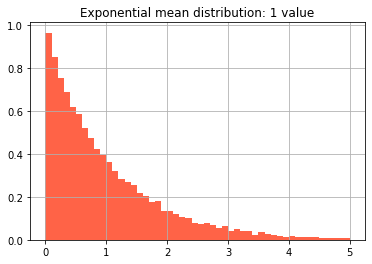

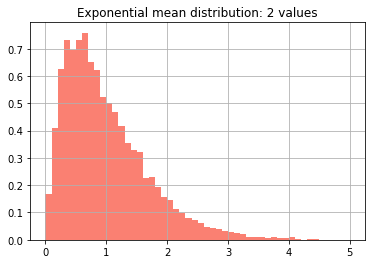

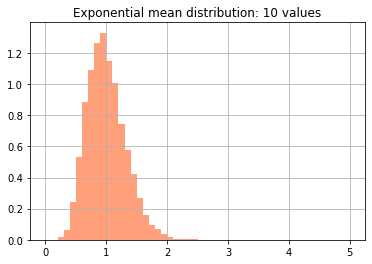

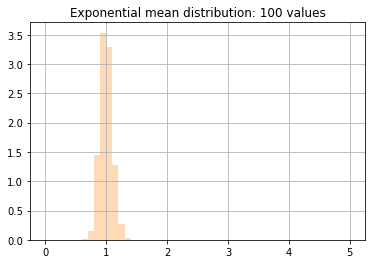

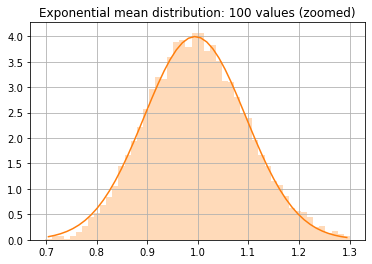

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def f(x,a,b,c):
    return a*np.exp(-((x-c)/(2*b))**2)

n_bins = 50

v = np.loadtxt("data/exp.txt", unpack = 'true')
v1 = v.copy()
v1 = v1[:10000] 
v2 = v.copy()
v2 = v2[10000:20000]
v3 = v.copy()
v3 = v3[20000:30000] 
v4 = v.copy()
v4 = v4[30000:40000]

plt.hist(v1, n_bins, range=(0,5), density=1, facecolor='tomato')
plt.title("Exponential mean distribution: 1 value")
plt.grid(True)

plt.figure()
plt.hist(v2, n_bins, range=(0,5), density=1, facecolor='salmon')
plt.title("Exponential mean distribution: 2 values")
plt.grid(True)

plt.figure()
plt.hist(v3, n_bins, range=(0,5),  density=1, facecolor='lightsalmon')
plt.title("Exponential mean distribution: 10 values")
plt.grid(True)

plt.figure()
plt.hist(v4, n_bins, range=(0,5), density=1, facecolor='peachpuff')
plt.title("Exponential mean distribution: 100 values")
plt.grid(True)

plt.figure()
n, bins, platches = plt.hist(v4, n_bins, range=(np.mean(v4)-3*np.std(v4),np.mean(v4)+3*np.std(v4)), density=1, facecolor='peachpuff')
plt.title("Exponential mean distribution: 100 values (zoomed)")
plt.grid(True)

# fit
x = bins + (6*np.std(v4))/(n_bins*2)
x = np.delete(x, n_bins)
y = n;
p_opt, p_cov= curve_fit(f, x, y, bounds=([0,0,-1,],[20,3,3]))
y_fit = f(x, p_opt[0], p_opt[1], p_opt[2])
plt.plot(x, y_fit)
print("Optimized param a, b, c:")
print(p_opt)
print("Param uncertaintes:")
print(np.diagonal(p_cov))

plt.show()

###### 3. CAUCHY-LORENTZ DISTRIBUTION: </font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, where $x\in [-\infty;+\infty]$, $ \Gamma=1$, $\mu=0$

Optimized param a, b, c:
[ 0.36549316  1.01312628 -0.00434118]
Param uncertaintes:
[1.66602282e-05 2.56729825e-04 1.24786955e-04]


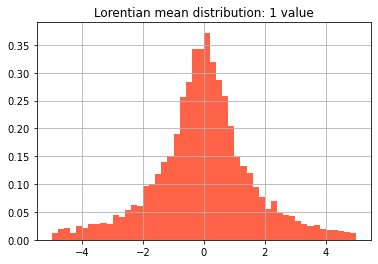

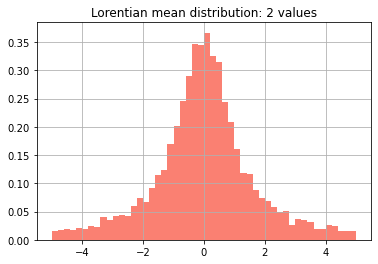

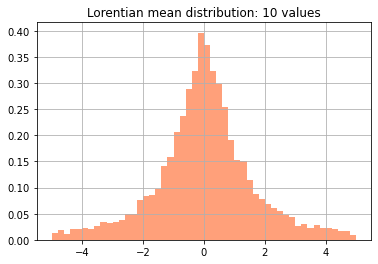

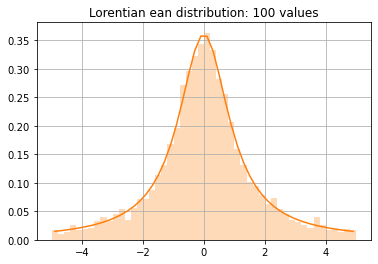

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def f(x,a,b,c):
    return a * b / ((x-c)**2 + b**2)

n_bins = 50

v = np.loadtxt("data/lorentian.txt", unpack = 'true')
v1 = v.copy()
v1 = v1[:10000] 
v2 = v.copy()
v2 = v2[10000:20000]
v3 = v.copy()
v3 = v3[20000:30000] 
v4 = v.copy()
v4 = v4[30000:40000]

plt.hist(v1, n_bins, range=(-5,5), density=1, facecolor='tomato')
plt.title('Lorentian mean distribution: 1 value')
plt.grid(True)

plt.figure()
platches = plt.hist(v2, n_bins, range=(-5,5), density=1, facecolor='salmon')
plt.title("Lorentian mean distribution: 2 values")
plt.grid(True)

plt.figure()
plt.hist(v3, n_bins, range=(-5,5),  density=1, facecolor='lightsalmon')
plt.title("Lorentian mean distribution: 10 values")
plt.grid(True)

plt.figure()
n, bins, platches = plt.hist(v4, n_bins, range=(-5,5), density=1, facecolor='peachpuff')
plt.title("Lorentian ean distribution: 100 values")
plt.grid(True)

# fit
x = bins + 10/(n_bins*2)
x = np.delete(x, n_bins)
y = n;
p_opt, p_cov= curve_fit(f, x, y, bounds=([0,0,-1,],[20,3,3]))
y_fit = f(x, p_opt[0], p_opt[1], p_opt[2])
plt.plot(x, y_fit)
print("Optimized param a, b, c:")
print(p_opt)
print("Param uncertaintes:")
print(np.diagonal(p_cov))

plt.show()

###### 4. DICE DISTRIBUTION: six-sided die not rigged

Also a discrete probability distribution converge to a continous Gaussian!

Optimized param a, b, c:
[2.31744889 0.12199043 3.50081928]
Param uncertaintes:
[3.08266800e-03 1.14261113e-05 2.27629486e-05]


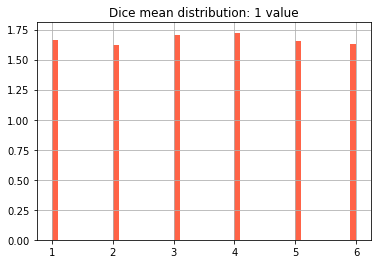

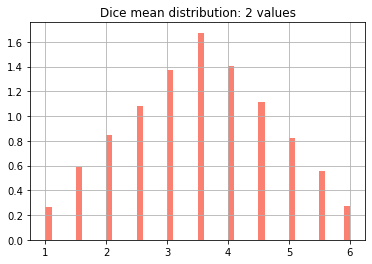

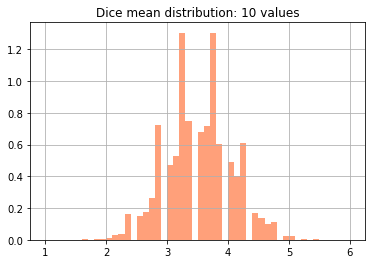

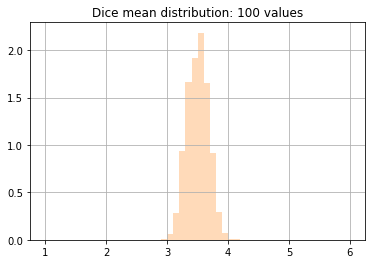

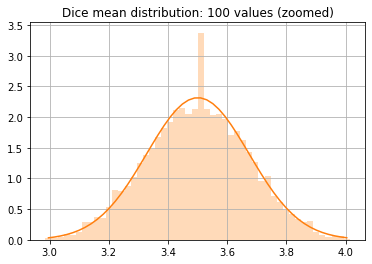

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def f(x,a,b,c):
    return a*np.exp(-((x-c)/(2*b))**2)

n_bins = 50

v = np.loadtxt("data/dice.txt", unpack = 'true')
v1 = v.copy()
v1 = v1[:10000] 
v2 = v.copy()
v2 = v2[10000:20000]
v3 = v.copy()
v3 = v3[20000:30000] 
v4 = v.copy()
v4 = v4[30000:40000]

plt.hist(v1, n_bins, range=(1,6), density=1, facecolor='tomato')
plt.title("Dice mean distribution: 1 value")
plt.grid(True)

plt.figure()
plt.hist(v2, n_bins, range=(1, 6), density=1, facecolor='salmon')
plt.title("Dice mean distribution: 2 values")
plt.grid(True)

plt.figure()
plt.hist(v3, n_bins, range=(1,6),  density=1, facecolor='lightsalmon')
plt.title("Dice mean distribution: 10 values")
plt.grid(True)

plt.figure()
plt.hist(v4, n_bins, range=(1,6), density=1, facecolor='peachpuff')
plt.title("Dice mean distribution: 100 values")
plt.grid(True)

plt.figure()
n, bins, platches = plt.hist(v4, n_bins, range=(np.mean(v4)-3*np.std(v4),np.mean(v4)+3*np.std(v4)), density=1, facecolor='peachpuff')
plt.title("Dice mean distribution: 100 values (zoomed)")
plt.grid(True)

# fit
x = bins + (6*np.std(v4))/(n_bins*2)
x = np.delete(x, n_bins)
y = n;
p_opt, p_cov= curve_fit(f, x, y, bounds=([0,0,-1,],[20,3,5]))
y_fit = f(x, p_opt[0], p_opt[1], p_opt[2])
plt.plot(x, y_fit)
print("Optimized param a, b, c:")
print(p_opt)
print("Param uncertaintes:")
print(np.diagonal(p_cov))

plt.show()

## Exercise 01.3

##### BUFFON'S SIMULATION: ESTIMATION OF PI. 

$S$ sticks $l=1$ long are thrown on a grid made of parallel lines $d=2$ apart. By counting how many sticks intersect the lines I have an estimate of the probability of intersection $P$, which by an integral can be shown to be equal to $P=2l/\pi d$.
I use the relationship above to estimate $\pi$. I use again data-blocking ($N$ cycles of $M$ throws).

The graph represents the progressive estimate (with error bars) for pi, as a function of the number of blocks. It can be seen that the estimate is compatible with the true value.

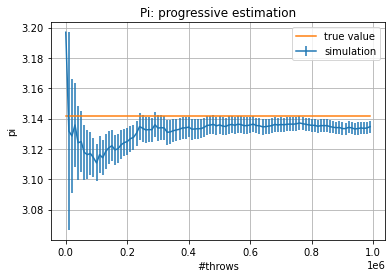

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import pi

M=1000000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]
x = x*L
z = np.full(N, pi)

sum_prog, err_prog = np.loadtxt("data/pi.txt", usecols =(0,1), unpack = 'true')

plt.errorbar(x,sum_prog,yerr=err_prog, label='simulation')
plt.plot(x,z, label='true value')
plt.title('Pi: progressive estimation')
plt.xlabel('#throws')
plt.ylabel('pi')
plt.grid(True)
plt.legend()

plt.show()